##This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
##this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [4]:
import pandas as pd
import matplotlib.pyplot as mtp
import numpy as np

df=pd.read_csv('/content/drive/MyDrive/CBD_Assignments/data/processed.cleveland.data',names=['age','sex','cp','trestbps','chol',
                                                 'fbs','restecg','thalach','exang',
                                                 'oldpeak','slope','ca','thal','num'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df['num'].unique()

array([0, 2, 1, 3, 4])

## converting values of num column to 1 when they are greater then 0 as it diagnoses the patient with heart disease.

In [7]:
# Change num values > 0 to 1 for a Diagnosis 
df['num'] = np.where((df['num']>0),1,0)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## we found that there are no null or empty values in the dataset but we have to check the datatype to see if any of them are of object type and if so then they may have null or empty values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## Looking at the information of the dataset we found that 2 of the attributes has the datatype as object so we decided to look into them to check if there is any value in string or other format

In [11]:
print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


##looking at the unique values of these 2 attributes we found that they contain ? so we will replace them with na

In [12]:
df.replace('?', np.NaN, inplace=True)

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

## we found that there are 4 missing values in ca column and 2 missing values in thal column. we decided to check the unique values of these columns as well as the mean,median and mode for the imputation.

In [14]:
# df = df.replace(np.NaN, 0)
print("mode of the ca attribute is :",df['ca'].astype(float).mode())
print("median of the ca attribute is :",df['ca'].astype(float).median())
print("mode of the thal attribute is :",df['thal'].astype(float).mode())
print("median of the thal attribute is :",df['thal'].astype(float).median())


mode of the ca attribute is : 0    0.0
dtype: float64
median of the ca attribute is : 0.0
mode of the thal attribute is : 0    3.0
dtype: float64
median of the thal attribute is : 3.0


## We can see that the modes of both columns ca and thal are 0 and 3 respectively. We will impute the database with that value. 

In [15]:
imputed_df=df.copy()
imputed_df['ca'] =imputed_df['ca'].fillna(imputed_df['ca'].mode()[0])
imputed_df['thal'] = imputed_df['thal'].fillna(imputed_df['thal'].mode()[0])


## now the null values are imputed

In [16]:
imputed_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Feature Engineering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aac45c710>,
      dtype=object)

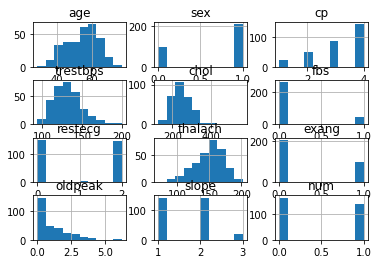

In [17]:
import matplotlib.pyplot as plt
import numpy as np

imputed_df.hist()

In [18]:
imputed_df['num'].unique()

array([0, 1])

In [19]:
imputed_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

## Saving the independed features in X and the dependend feature in Y 


In [20]:
X = imputed_df.iloc[:, :-1].values
Y = imputed_df.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [23]:
y_train.shape

(242,)

# Importing all the classifier models from sklearn to train and compare with the data. Here we will train with logistic regression, Gaussian naive bayes,SVC,Decision Tree classifier, random forest classifier, gradient boosting. 


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
def save_results(results,name,filename_pr):
    with open(filename_pr, mode='w') as file_object:
        print(name,file=file_object)
        print('Best Parameters: {}\n'.format(results.best_params_),file=file_object)
        print('Best Parameters: {}\n'.format(results.best_params_))
        print("The cv results are as follows : {}\n".format(results.cv_results_),file=file_object)

In [26]:
import os

# Make Directory
# os.mkdir(r"/content/drive/MyDrive/CBD_Assignments/GB")
# os.mkdir(r"/content/drive/MyDrive/CBD_Assignments/GB_user_defined")
# os.mkdir(r"/content/drive/MyDrive/CBD_Assignments/outputs")
# os.mkdir(r"/content/drive/MyDrive/CBD_Assignments/outputs/models")
# os.mkdir(r"/content/drive/MyDrive/CBD_Assignments/outputs/figures")

In [27]:
import joblib

In [28]:
np.isnan(x_train).sum()

0

In [29]:
svc_model_dir=os.path.join("/content/drive/MyDrive/CBD_Assignments/SVC",'svc_model.pkl')

svc_algo = SVC()

svc_parameters = {'kernel':('linear', 'rbf','sigmoid'), 'C':[1, 10]}

svc_cv=GridSearchCV(svc_algo, svc_parameters)

svc_cv.fit(x_train, y_train)

save_results(svc_cv,'svm',os.path.join("/content/drive/MyDrive/CBD_Assignments/SVC",'SVC_results.txt'))

classifier=svc_cv.best_estimator_
joblib.dump(classifier,svc_model_dir) 

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Best Parameters: {'C': 1, 'kernel': 'rbf'}

Accuracy for training set for svm = 0.9214876033057852
Accuracy for test set for svm = 0.8032786885245902


In [30]:
GNB_model_dir=os.path.join("/content/drive/MyDrive/CBD_Assignments/GNB",'GNB_model.pkl')

gnb_algo = GaussianNB()

gnb_parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb_cv=GridSearchCV(gnb_algo, gnb_parameters)

gnb_cv.fit(x_train, y_train)

save_results(gnb_cv,'gnb',os.path.join("/content/drive/MyDrive/CBD_Assignments/GNB",'GNB_results.txt'))

gnb_classifier=gnb_cv.best_estimator_
joblib.dump(gnb_classifier,GNB_model_dir) 

# Predicting the Test set results
y_pred = gnb_classifier.predict(x_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = gnb_classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Best Parameters: {'var_smoothing': 0.0657933224657568}

Accuracy for training set for Naive Bayes = 0.8636363636363636
Accuracy for test set for Naive Bayes = 0.8032786885245902


In [31]:
log_reg_model_dir=os.path.join("/content/drive/MyDrive/CBD_Assignments/logistic_regression",'log_reg_model.pkl')

log_reg = LogisticRegression()

log_reg_parameters = {'penalty':['l1','l2'], 
              'C':[1, 10, 100, 1000]}

logreg_cv=GridSearchCV(log_reg, log_reg_parameters)
logreg_cv.fit(x_train, y_train)
save_results(logreg_cv,'log_reg',os.path.join("/content/drive/MyDrive/CBD_Assignments/logistic_regression",'log_reg_results.txt'))

logreg_classifier=logreg_cv.best_estimator_
joblib.dump(logreg_classifier,log_reg_model_dir) 

# Predicting the Test set results
y_pred = logreg_classifier.predict(x_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = logreg_classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Best Parameters: {'C': 1, 'penalty': 'l2'}

Accuracy for training set for Logistic Regression = 0.8677685950413223
Accuracy for test set for Logistic Regression = 0.7868852459016393


In [32]:
dtree_model_dir=os.path.join("/content/drive/MyDrive/CBD_Assignments/Decision_Tree",'dtree_model.pkl')


dtree_algo= DecisionTreeClassifier()
dtree_parameters = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy'],
                    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtree_cv=GridSearchCV(dtree_algo, dtree_parameters)
dtree_cv.fit(x_train, y_train)
save_results(dtree_cv,'dtree',os.path.join("/content/drive/MyDrive/CBD_Assignments/Decision_Tree",'dtree_results.txt'))

dtree_classifier=dtree_cv.best_estimator_
joblib.dump(dtree_classifier,dtree_model_dir) 

dtree_classifier.fit(x_train, y_train)

y_pred = dtree_classifier.predict(x_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = dtree_classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 3}

Accuracy for training set for Decision Tree = 0.8636363636363636
Accuracy for test set for Decision Tree = 0.7868852459016393


In [33]:
rf_model_dir=os.path.join("/content/drive/MyDrive/CBD_Assignments/Random_Forest",'rf_model.pkl')


rf_algo= RandomForestClassifier()
rf_parameters = { 
           "n_estimators"      : [250, 300],
           "criterion"         : ["gini", "entropy"],
           "max_depth"         : [10, 20]}

rf_cv=GridSearchCV(rf_algo, rf_parameters)
rf_cv.fit(x_train, y_train)
save_results(rf_cv,'rf',os.path.join("/content/drive/MyDrive/CBD_Assignments/Random_Forest",'rf_results.txt'))

rf_classifier=rf_cv.best_estimator_
joblib.dump(rf_classifier,rf_model_dir) 


# Predicting the Test set results
y_pred = rf_classifier.predict(x_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = rf_classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 250}

Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.7540983606557377


In [34]:
GB_model_dir=os.path.join("/content/drive/MyDrive/CBD_Assignments/GB",'GB_model.pkl')

gb = GradientBoostingClassifier()   
parameters = {
        'learning_rate': [0.01, 0.001,0.1],
        'n_estimators': [100,200,300,400,500],
        'max_depth': [1,2,3,4,5]
        }
cv=GridSearchCV(gb, parameters)
cv.fit(x_train, y_train)
save_results(cv,'Gradient Boost (GB)',os.path.join("/content/drive/MyDrive/CBD_Assignments/GB",'GR_GridSearchCV_results.txt'))
gb_classifier=cv.best_estimator_
joblib.dump(gb_classifier,GB_model_dir)

y_pred = gb_classifier.predict(x_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = gb_classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Gradient Boosting = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Gradient Boosting = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 400}

Accuracy for training set for Gradient Boosting = 0.8801652892561983
Accuracy for test set for Gradient Boosting = 0.819672131147541


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

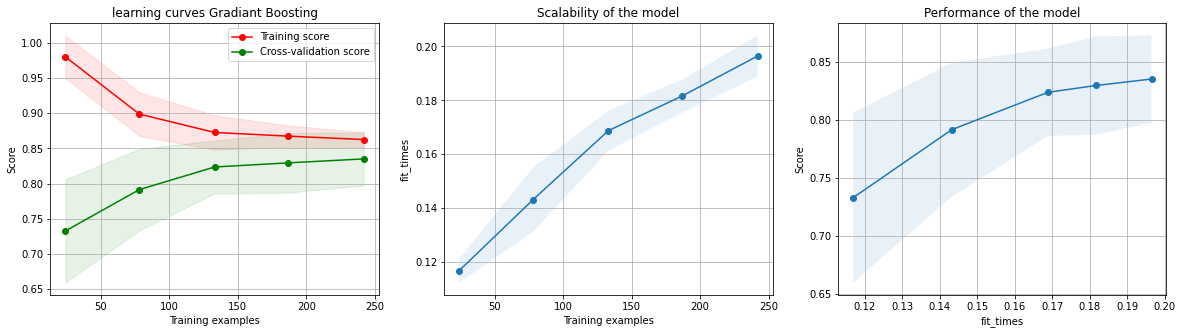

In [35]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,n_jobs=None,scoring=None,train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


title = "learning curves Gradiant Boosting"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
plot_learning_curve(
    gb_classifier, title, X, Y, cv=cv
)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

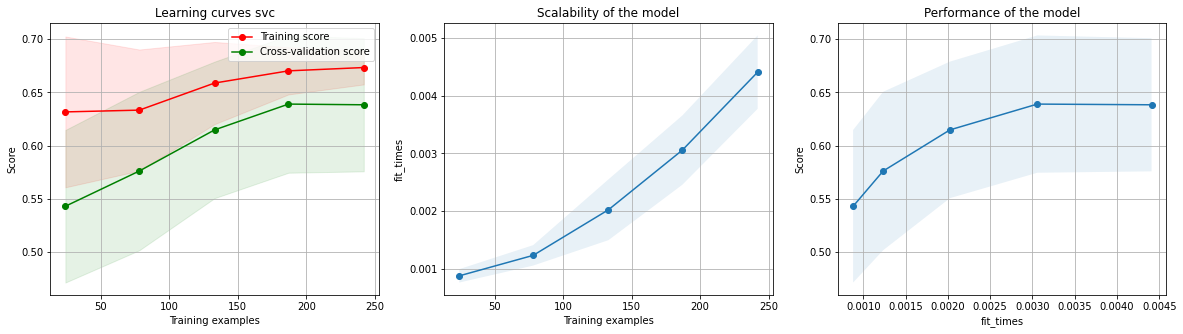

In [36]:
svn_title="Learning curves svc"
plot_learning_curve(
    classifier, svn_title, X, Y, cv=cv
)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

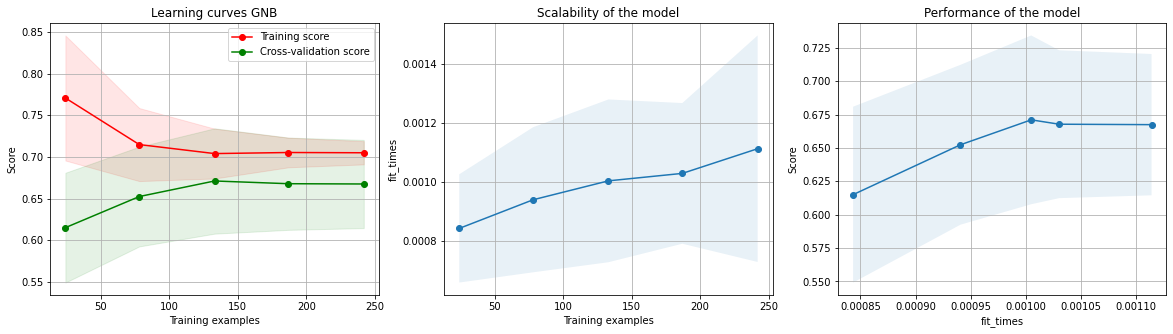

In [37]:
gnb_title="Learning curves GNB"
plot_learning_curve(
    gnb_classifier, gnb_title, X, Y, cv=cv
)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

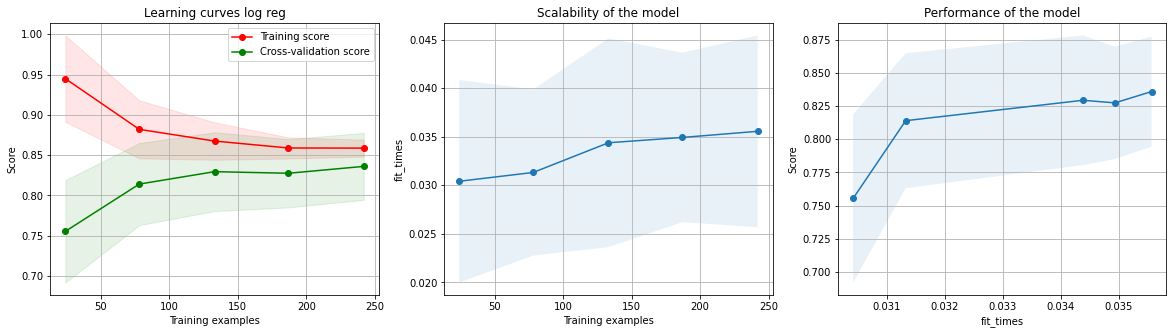

In [38]:
logreg_title="Learning curves log reg"
plot_learning_curve(
    logreg_classifier, logreg_title, X, Y, cv=cv
)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

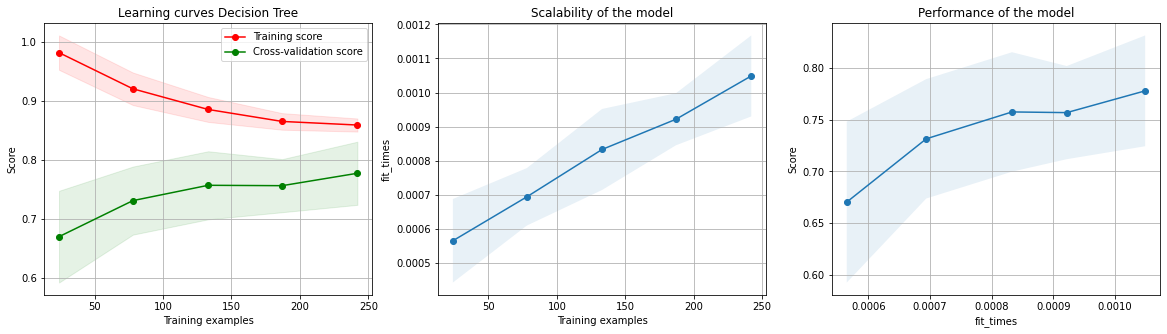

In [39]:
dtree_title="Learning curves Decision Tree"
plot_learning_curve(
    dtree_classifier, dtree_title, X, Y, cv=cv
)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

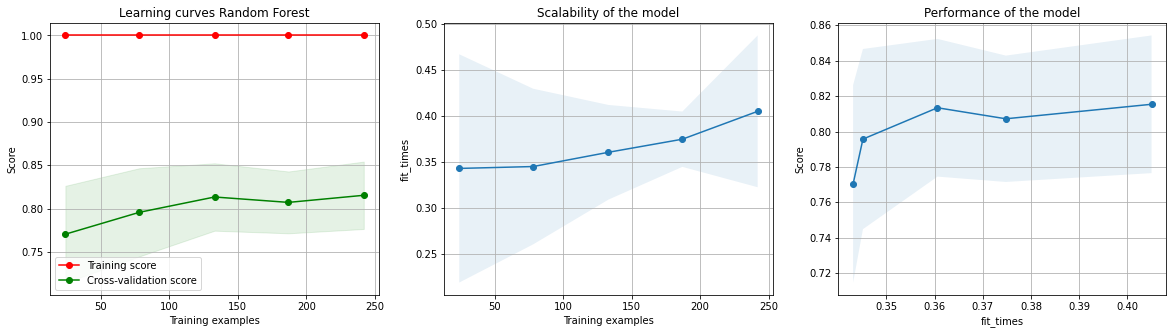

In [40]:
rf_title="Learning curves Random Forest"
plot_learning_curve(
    rf_classifier, rf_title, X, Y, cv=cv
)